<a href="https://colab.research.google.com/github/mcnica89/Markov-Chains-RL-W25/blob/main/Th_Feb11_GamblersProblemWithArrays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gambler's Problem Solved with Arrays

From class on Th Feb 11

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

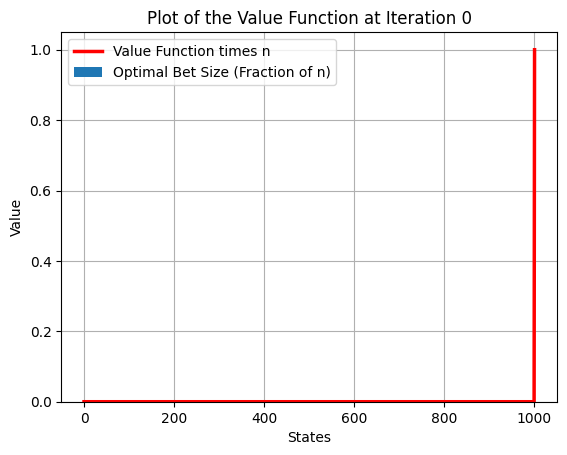

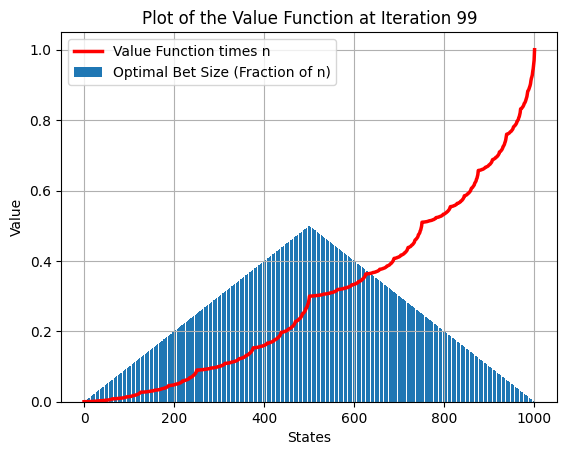

In [ ]:
n = 1001
p_win = 0.3

v = np.zeros(n+1) #THE VALUE FUNCTION! #n+1 since python starts at zero
#v[s] represents the value at state s for s in 0 to n inclusive

q = np.zeros((n+1,n+1)) #THE Q FUNCTIONS! q[s,a] s is betw 0 and 100, a is betw 0 and 100

s,a = np.indices((n+1,n+1))
legal_state_action = ( a <= np.minimum(s,n-s) ) & (a>=1) & (s>= 1)  & (s<=n-1)
# & is short for np.logical_and
# @ is short for np.matmul
q[s,a] = np.where(legal_state_action, 0.0, -1.0)   #if a>min(s,n-s), then set q function to -1, so that this is never chosen when doing a maximum.

#np.where = The array version of an "IF" statement
#np.where(BOOLEAN THING, TRUE VALUE, FALSE VALUE)

v[0] = 0.0
v[n] = 1.0
q[0,:] = v[0] #in the terminal state, there are no choices! Make the entire thing equal to v[0]
q[n,:] = v[n] #in the terminal state, there are no choices left! Make the entire thing equal to v[0]

policy = np.ones(n+1) #THE POLICY! Tells you the optimal bet size at position s
#will be derived from the q function
q_tie_breaks = np.zeros((n+1,n+1))

num_iters = 100
for iter in range(num_iters):
  #Bellman Equation iterated ONCE

  #first part of the Belman equation!
  v = np.max( q, axis=-1 )
  policy = np.argmax( q , axis=-1 )
  #note that np.max does the maximum over ALL the entires, not just the legal ones. But since we set the q value to -1 in illegal situations, this will always work for us. WARNING: the argmax will potential return something random if its a tie or close to a tie.
  #epsilon = 1e-8 #tie break to make it choose the largest action
  #q_tie_breaks[s,a] = q[s,a] + epsilon*a
  #policy = np.argmax( q_tie_breaks, axis=-1 )


  #second part of the Belman equaiton
  q[s,a] = np.where(legal_state_action, p_win*v[np.minimum(s+a,n)]+(1-p_win)*v[np.maximum(s-a,0)], q[s,a]) #update q at all the legal_actions. If its not in the list of legal actions, then leave it unchanged.

  #plotting stuff
  num_plots = 1 #num_iters
  if iter==0 or (iter+1) % (num_iters // num_plots) == 0: #plot 10 times
    x = range(n+1)  # Assuming each index corresponds to x values
    plt.plot(x, v,linewidth=2.5,color='r',label="Value Function times n")
    plt.bar(x,policy/n,label="Optimal Bet Size (Fraction of n)")
    plt.xlabel('States')
    plt.ylabel('Value')
    plt.title(f'Plot of the Value Function at Iteration {iter}')
    plt.grid(True)
    plt.legend()
    plt.show()


In [ ]:
()

()